In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [7]:
iris = pd.read_csv("Iris.csv")

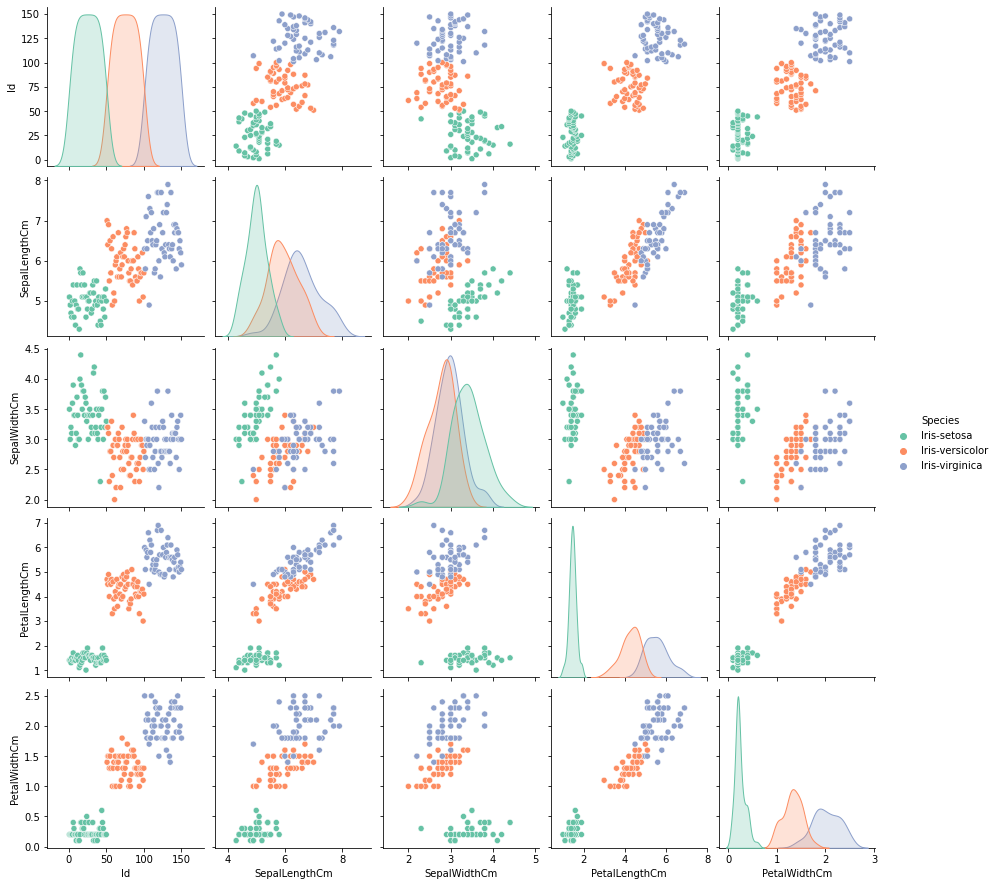

In [8]:
sns.pairplot(data=iris, hue='Species', palette='Set2')

In [9]:
from sklearn.model_selection import train_test_split
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:, -1]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [10]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)

SVC()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 14  0]
 [ 0  2 15]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [14]:
model.score(x_test,y_test)

0.9555555555555556

In [15]:
#Grid search is a model hyperparameter optimization technique
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [17]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.333 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.619 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.524 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.333 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.619 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [18]:
pred_grid = grid.predict(x_test)

In [19]:
print(confusion_matrix(y_test, pred_grid))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]


In [20]:
print(classification_report(y_test, pred_grid))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

